___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [94]:
#pip install matplotlib

In [95]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import pickle

In [96]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [97]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.000,80000.000,83450.000,73000.000,16200.000
Type,Used,Used,Used,Used,Used
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board comput...","Bluetooth,Hands-free equipment,On-board comput...","MP3,On-board computer","Bluetooth,CD player,Hands-free equipment,MP3,O...","Bluetooth,CD player,Hands-free equipment,MP3,O..."
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control","Alloy wheels,Sport seats,Voice Control","Alloy wheels,Sport package,Sport suspension,Vo..."
Safety_Security,"ABS,Central door lock,Daytime running lights,D...","ABS,Central door lock,Central door lock with r...","ABS,Central door lock,Daytime running lights,D...","ABS,Alarm system,Central door lock with remote...","ABS,Central door lock,Driver-side airbag,Elect..."


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   km                   15909 non-null  float64
 4   Type                 15909 non-null  object 
 5   Fuel                 15909 non-null  object 
 6   Comfort_Convenience  15909 non-null  object 
 7   Entertainment_Media  15909 non-null  object 
 8   Extras               15909 non-null  object 
 9   Safety_Security      15909 non-null  object 
 10  Gears                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Previous_Owners      15909 non-null  float64
 13  hp_kW                15909 non-null  float64
 14  Inspection_new       15909 non-null  int64  
 15  Paint_Type           15909 non-null 

In [99]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000
mean,18020.242,32103.947,5.937,1.388,1.043,88.496,0.247,1428.657,1337.675,4.824,117.783
std,7377.201,36973.389,0.705,1.122,0.339,26.668,0.431,275.852,199.672,0.888,18.023
min,4950.000,0.000,5.000,0.000,0.000,44.000,0.000,890.000,840.000,3.000,45.000
25%,12850.000,1913.000,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.000,104.000
50%,16900.000,20410.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800,117.000
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400,129.000
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100,253.000


In [100]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

## Feature Engineering

In [101]:
df.select_dtypes("object").head()

,make_model,body_type,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [102]:
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())

make_model          : 8
body_type           : 8
Type                : 5
Fuel                : 3
Comfort_Convenience : 6193
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4439
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


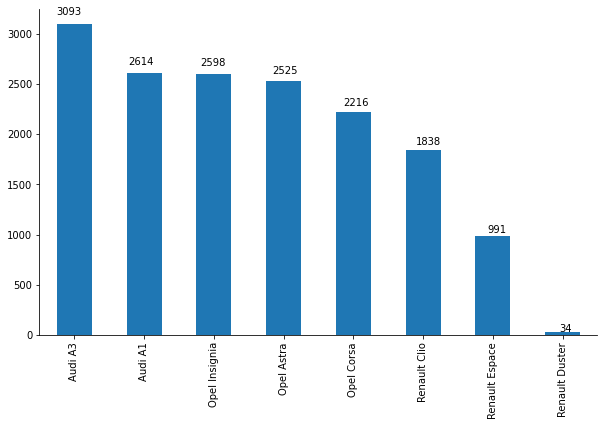

In [103]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [104]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission


In [105]:
df.drop(index = [2614], inplace = True)

In [106]:
df.shape

(15908, 23)

<AxesSubplot:xlabel='price', ylabel='Count'>

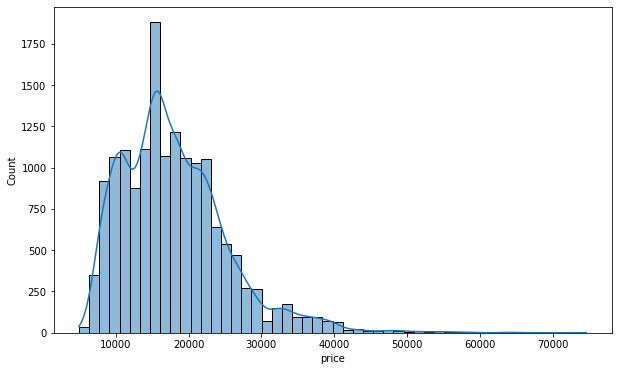

In [107]:
sns.histplot(df.price, bins = 50, kde=True)

In [108]:
skew(df.price)

1.2368422521321827

In [109]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,99.000
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,129.000
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,99.000
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,99.000
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,109.000
...,...,...,...,...,...,...,...,...,...,...,...
15904,39950,1833.262,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,139.000
15905,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400,168.000
15906,39875,15.000,6.000,0.000,1.000,146.000,1,1997.000,1734.000,5.300,139.000
15907,39700,10.000,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300,139.000


<AxesSubplot:>

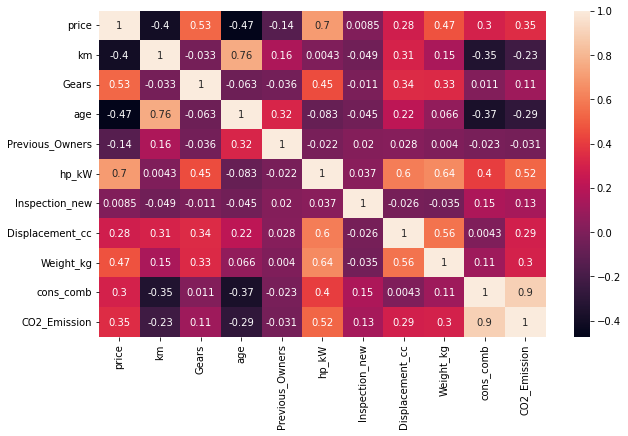

In [110]:
sns.heatmap(df_numeric.corr(), annot=True)

## multicollinearity control

In [111]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [112]:
df_numeric.corr()[(df_numeric.corr() <= -0.9) & (df_numeric.corr() > -1)].any().any()

False

<AxesSubplot:xlabel='price'>

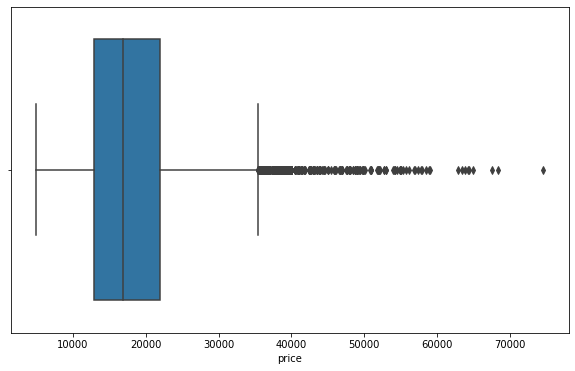

In [113]:
sns.boxplot(df.price)

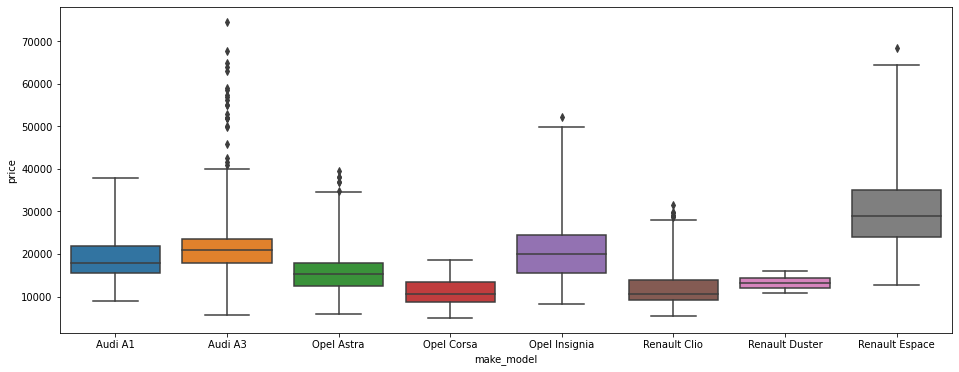

In [114]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [115]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [116]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [117]:
df = pd.get_dummies(df, drop_first =True)

In [118]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,99.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,129.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,99.000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,99.000,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,109.000,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,

In [119]:
df.shape

(15908, 132)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15908 entries, 0 to 15908
Columns: 132 entries, price to Drive_chain_rear
dtypes: float64(9), int64(96), uint8(27)
memory usage: 13.8 MB


In [121]:
df.isnull().any().any()

False

In [122]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.472
Gearing_Type_Manual                        -0.432
km                                         -0.399
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.367
make_model_Renault Clio                    -0.298
Drive_chain_front                          -0.156
Previous_Owners                            -0.144
make_model_Opel Astra                      -0.128
em_CD player                               -0.093
em_On-board computer                       -0.077
ss_Central door lock with remote control   -0.070
ss_Fog lights                              -0.053
Paint_Type_Perl effect                     -0.050
ss_Isofix                                  -0.046
body_type_Sedans                           -0.045
ss_Central door lock                       -0.044
ss_Power steering                          -0.042
ss_Head airbag                             -0.035
Paint_Type_Uni/basic                       -0.035


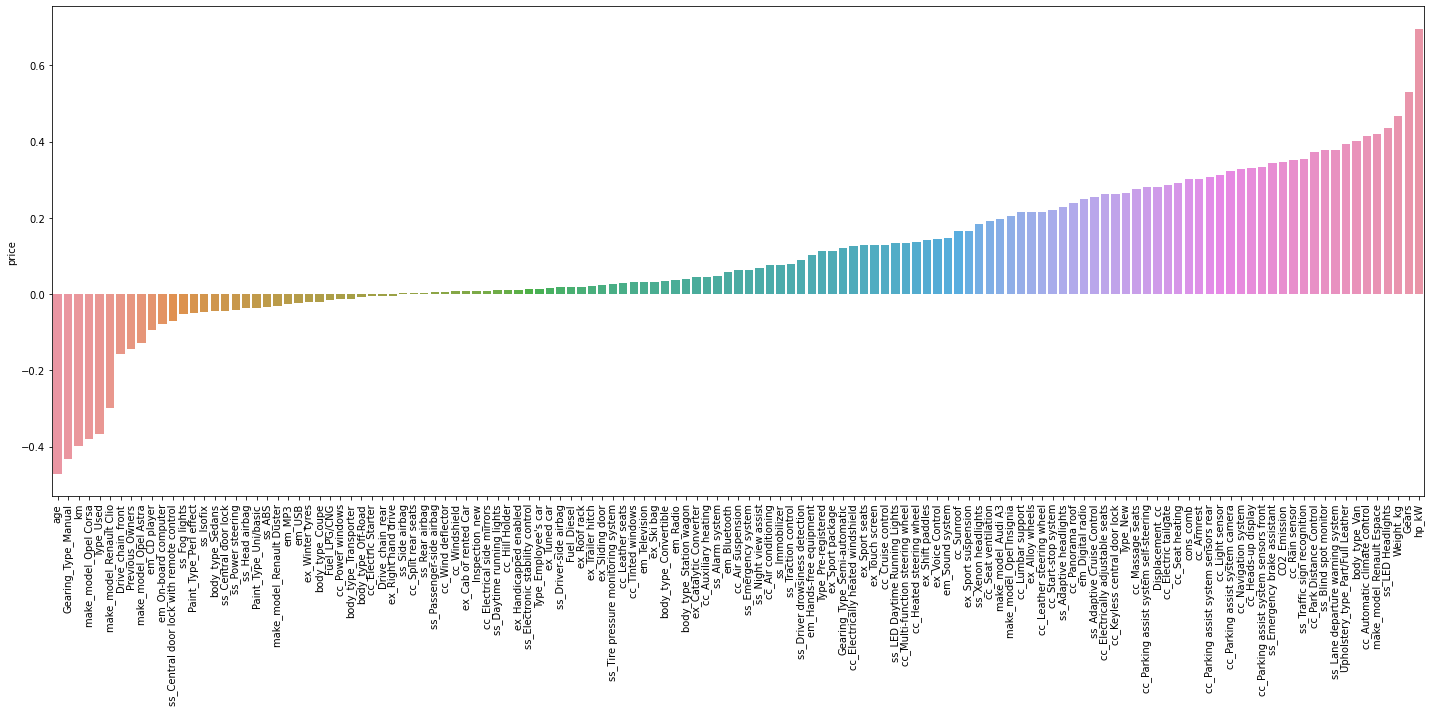

In [123]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [124]:
X = df.drop("price", axis =1)
y = df["price"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
X_train.shape

(11135, 131)

In [127]:
X_test.shape

(4773, 131)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [128]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [129]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [130]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [131]:
y_pred = lm.predict(X_test)

In [132]:
y_train_pred = lm.predict(X_train)

In [133]:
pd.options.display.float_format = '{:.3f}'.format

In [134]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.889
mae,1693.620,1726.683
mse,5938772.698,6032533.147
rmse,2436.960,2456.122


## Cross Validate

In [135]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [136]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.172,0.004,0.880,-1790.961,-6912036.030,-2629.075
1,0.124,0.004,0.884,-1719.379,-6202465.729,-2490.475
2,0.125,0.004,0.880,-1671.587,-6406898.859,-2531.185
3,0.350,0.005,0.885,-1796.668,-7153093.874,-2674.527
4,0.250,0.009,0.893,-1713.627,-5678195.082,-2382.896
5,0.315,0.008,0.893,-1693.701,-5889686.263,-2426.868
6,0.289,0.010,0.886,-1706.342,-5486843.571,-2342.401
7,0.246,0.005,0.882,-1809.788,-7090237.931,-2662.750
8,0.262,0.008,0.897,-1634.491,-5235497.828,-2288.121
9,0.244,0.006,0.889,-1652.805,-5552974.897,-2356.475


In [137]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.887
test_neg_mean_absolute_error          -1718.935
test_neg_mean_squared_error        -6160793.006
test_neg_root_mean_squared_error      -2478.477
dtype: float64

In [138]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8887747283490239
MAE 		: 1726.6834381517117
MSE 		: 6032533.146539671
RMSE 		: 2456.1215659123372


In [139]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Prediction Error

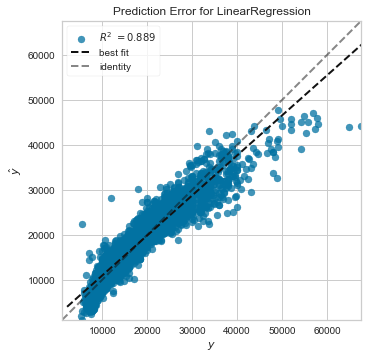

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [140]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

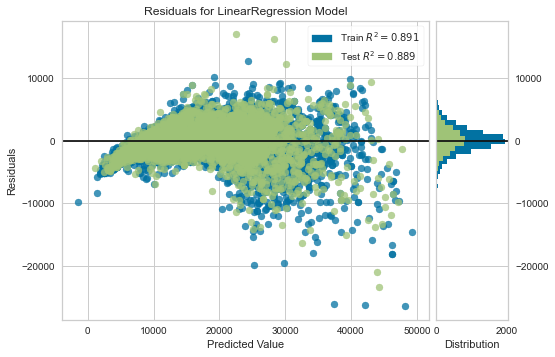

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [141]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [142]:
df.price.mean()

18020.68990445059

In [143]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [144]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
13578,7950,6003.800,1946.200
2949,15880,18491.646,-2611.646
3112,15000,12988.545,2011.455
1564,23475,23728.715,-253.715
1080,19990,20655.336,-665.336
420,15900,14911.065,988.935
9247,8490,9723.747,-1233.747
9306,13999,12588.851,1410.149
5428,24000,25313.144,-1313.144
8419,12625,13620.762,-995.762


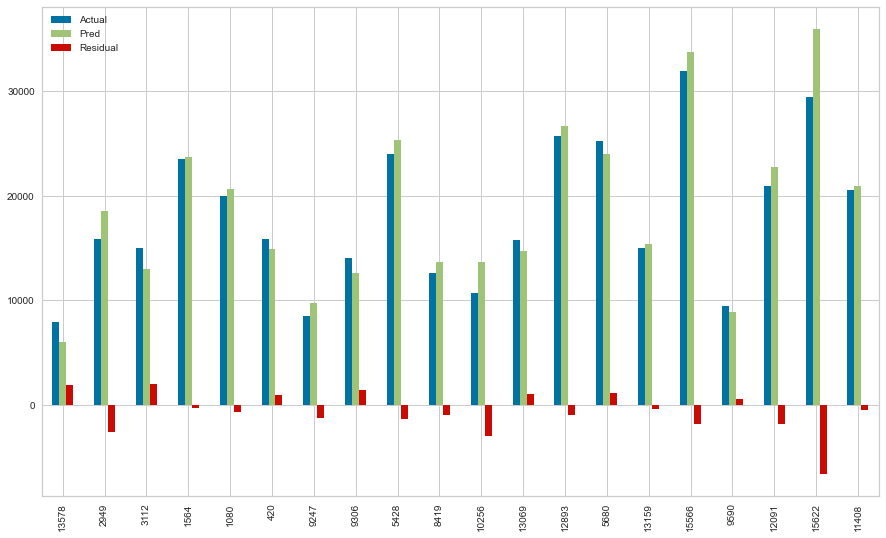

In [145]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [146]:
pd.DataFrame(lm.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-7642.365
make_model_Renault Clio,-5569.727
make_model_Opel Corsa,-5278.867
make_model_Opel Astra,-4055.122
Type_Employee's car,-2986.448
Type_Used,-2766.486
Type_Pre-registered,-2266.682
Drive_chain_rear,-2088.934
Drive_chain_front,-2084.781
age,-1638.628


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [147]:
scaler = MinMaxScaler()

In [148]:
scaler.fit(X_train)

MinMaxScaler()

In [149]:
X_train = scaler.transform(X_train)

In [150]:
X_test = scaler.transform(X_test)

## Ridge

In [151]:
from sklearn.linear_model import Ridge, RidgeCV

In [152]:
ridge_model = Ridge()

In [153]:
ridge_model.fit(X_train, y_train)

Ridge()

In [154]:
y_pred = ridge_model.predict(X_test)

In [155]:
y_train_pred = ridge_model.predict(X_train)

In [156]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.889
mae,1692.413,1725.992
mse,5942959.475,6046507.921
rmse,2437.819,2458.965


## Finding best alpha for Ridge

In [157]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [158]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [159]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+0...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02]),
        cv=10, scoring='neg_root_mean_squared_error')

In [160]:
ridge_cv_model.alpha_

0.01

In [161]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [162]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.889
mae,1693.601,1726.665
mse,5938773.227,6032620.932
rmse,2436.960,2456.139


In [163]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [164]:
pd.DataFrame(ridge_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11429.795
make_model_Renault Duster,-7634.977
CO2_Emission,-6985.782
make_model_Renault Clio,-5569.564
make_model_Opel Corsa,-5280.117
age,-4916.419
make_model_Opel Astra,-4054.691
Type_Employee's car,-2986.209
Type_Used,-2766.348
Type_Pre-registered,-2266.453


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [165]:
from sklearn.linear_model import Lasso, LassoCV

In [166]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [167]:
y_train_pred = lasso_model.predict(X_train)

In [168]:
y_pred = lasso_model.predict(X_test)

In [169]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.889
mae,1695.177,1725.837
mse,5954035.626,6035122.474
rmse,2440.089,2456.649


## Finding best alpha for Lasso

In [170]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)

In [171]:
lasso_cv_model.alpha_

1.02

In [172]:
y_train_pred = lasso_cv_model.predict(X_train)

In [173]:
y_pred = lasso_cv_model.predict(X_test)

In [174]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.889
mae,1695.221,1725.860
mse,5954547.751,6035466.256
rmse,2440.194,2456.719


In [175]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [176]:
pd.DataFrame(lasso_cv_model.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11220.237
make_model_Renault Duster,-7577.302
make_model_Renault Clio,-5487.354
make_model_Opel Corsa,-5339.118
age,-4959.577
CO2_Emission,-4413.309
make_model_Opel Astra,-4032.160
Type_Employee's car,-2882.704
Type_Used,-2692.919
Type_Pre-registered,-2168.895


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [177]:
from sklearn.linear_model import ElasticNet

In [178]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [179]:
y_train_pred = elastic_model.predict(X_train)

In [180]:
y_pred = elastic_model.predict(X_test)

In [181]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.607,0.600
mae,3353.092,3339.347
mse,21402399.567,21694895.126
rmse,4626.273,4657.778


## Finding best alpha and l1_ratio for ElasticNet

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
elastic_model = ElasticNet()

In [184]:
param_grid = {'alpha':[1, 2.03, 3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [185]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [186]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1, 2.03, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [187]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=1)

In [188]:
y_train_pred = grid_model.predict(X_train)

In [189]:
y_pred = grid_model.predict(X_test)

In [190]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.891,0.889
mae,1695.177,1725.837
mse,5954035.626,6035122.474
rmse,2440.089,2456.649


In [191]:
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

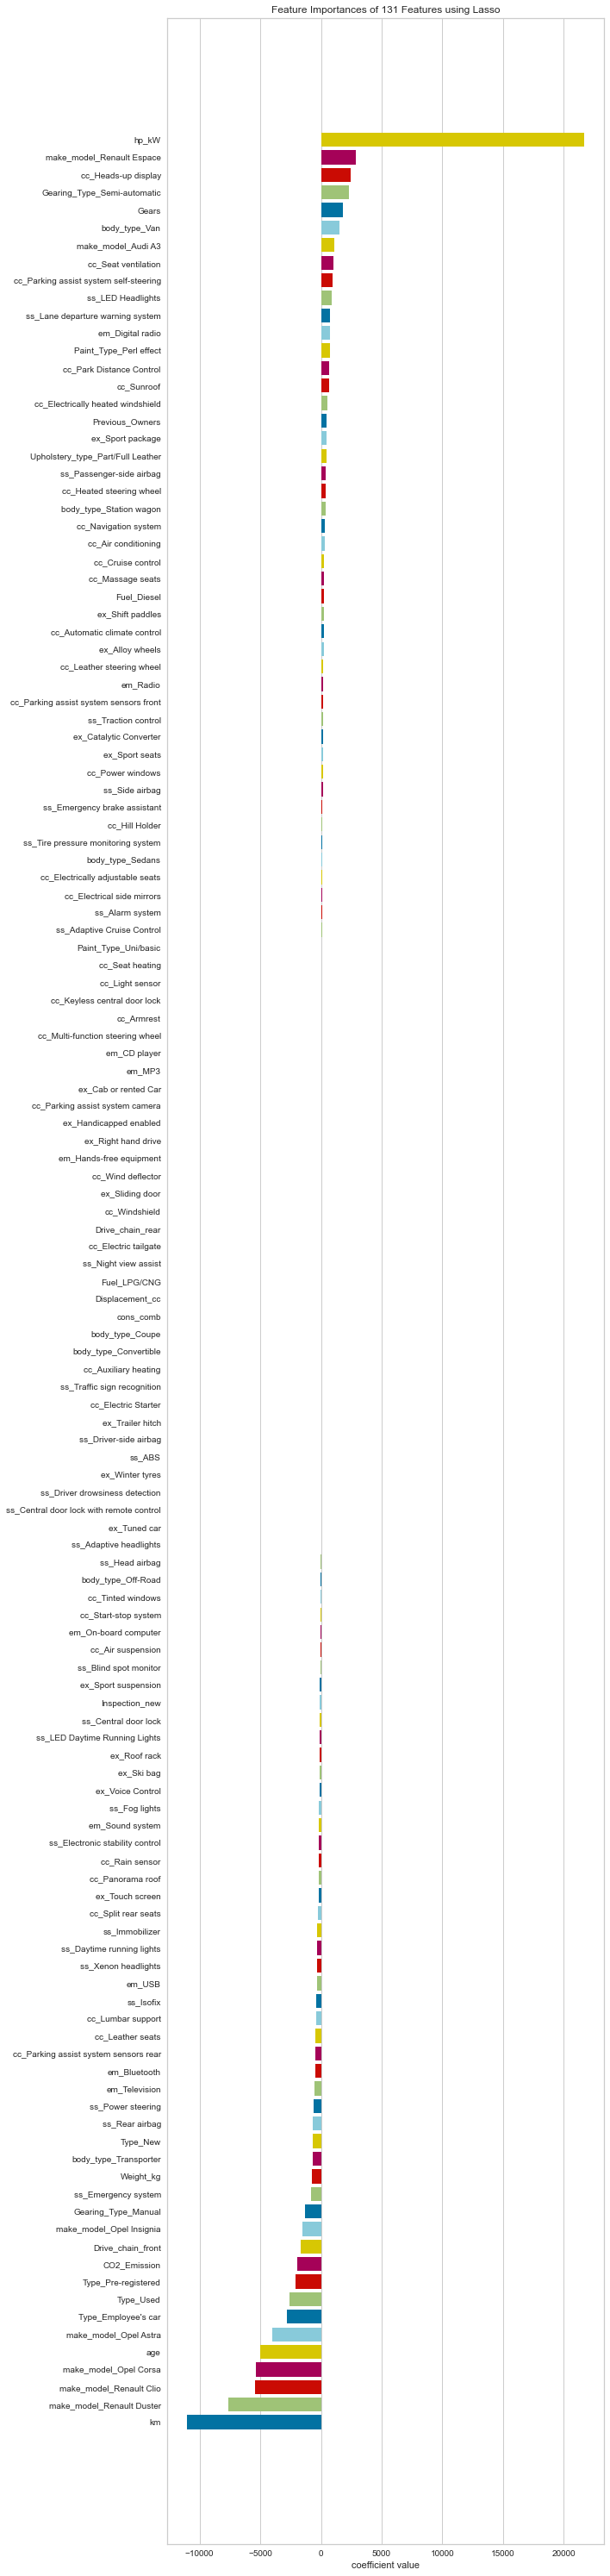

<AxesSubplot:title={'center':'Feature Importances of 131 Features using Lasso'}, xlabel='coefficient value'>

In [192]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=2.03), labels=df.drop(columns="price").columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [193]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [194]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000


In [195]:
df_new = df[["make_model", "hp_kW", "km","age", "price", "Gearing_Type"]]

In [196]:
df_new

,make_model,hp_kW,km,age,price,Gearing_Type
0,Audi A1,66.000,56013.000,3.000,15770,Automatic
1,Audi A1,141.000,80000.000,2.000,14500,Automatic
2,Audi A1,85.000,83450.000,3.000,14640,Automatic
3,Audi A1,66.000,73000.000,3.000,14500,Automatic
4,Audi A1,66.000,16200.000,3.000,16790,Automatic
...,...,...,...,...,...,...
15904,Renault Espace,147.000,1833.262,0.000,39950,Automatic
15905,Renault Espace,165.000,9900.000,0.000,39885,Automatic
15906,Renault Espace,146.000,15.000,0.000,39875,Automatic
15907,Renault Espace,147.000,10.000,0.000,39700,Automatic


In [197]:
df_new[["make_model"]].value_counts()

make_model    
Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
dtype: int64

In [198]:
df_new.hp_kW.max()

294.0

In [199]:
df_new["hp_kW"].value_counts(dropna=False)

85.000     2543
66.000     2122
81.000     1403
100.000    1316
110.000    1114
70.000      890
125.000     715
51.000      703
55.000      588
118.000     552
92.000      466
121.000     392
147.000     380
77.000      353
56.000      296
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
146.000      18
294.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
117.000       6
155.000       6
184.000       5
65.000        4
90.000        4
76.000        4
80.000        3
93.000        3
98.000        3
149.000       3
168.000       3
53.000        2
167.000       2
63.000        2
127.000       2
86.000        2
89.000        2
143.000       2
140.000       2
228.000 

In [200]:
df_new["km"].value_counts(dropna=False)

10.000       1044
1833.262      985
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6689, dtype: int64

In [201]:
df_new["age"].value_counts(dropna=False)

1.000    4516
0.000    4448
3.000    3672
2.000    3273
Name: age, dtype: int64

In [202]:
df_new["Gearing_Type"].value_counts()

Manual            8148
Automatic         7296
Semi-automatic     465
Name: Gearing_Type, dtype: int64

In [203]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800,99.000
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600,129.000
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800,99.000
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800,99.000
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100,109.000


In [204]:
df_new.km.value_counts()

10.000       1044
1833.262      985
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6689, dtype: int64

In [205]:
df_new.km.min()

0.0

In [206]:
df_new.km.max()

317000.0

In [207]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make_model    15909 non-null  object 
 1   hp_kW         15909 non-null  float64
 2   km            15909 non-null  float64
 3   age           15909 non-null  float64
 4   price         15909 non-null  int64  
 5   Gearing_Type  15909 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 745.9+ KB


In [208]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,price,Gearing_Type


In [209]:
df_new.drop(index=[2614], inplace =True)

In [210]:
df_new = pd.get_dummies(df_new)

In [211]:
df_new

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,147.000,1833.262,0.000,39950,0,0,0,0,0,0,0,1,1,0,0
15905,165.000,9900.000,0.000,39885,0,0,0,0,0,0,0,1,1,0,0
15906,146.000,15.000,0.000,39875,0,0,0,0,0,0,0,1,1,0,0
15907,147.000,10.000,0.000,39700,0,0,0,0,0,0,0,1,1,0,0


In [212]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [214]:
scaler = MinMaxScaler()

In [215]:
scaler.fit(X_train)

MinMaxScaler()

In [216]:
X_train = scaler.transform(X_train)

In [217]:
X_test = scaler.transform(X_test)

In [218]:
lasso_final_model = LassoCV(alphas = alpha_space, max_iter = 100000, cv =10)

In [219]:
lasso_final_model.fit(X_train, y_train)

LassoCV(alphas=array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+0...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02]),
        cv=10, max_iter=100000)

In [220]:
lasso_final_model.alpha_

0.01

In [221]:
y_train_pred = lasso_final_model.predict(X_train)
y_pred = lasso_final_model.predict(X_test)

In [222]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.848,0.848
mae,1978.688,1984.407
mse,8294078.025,8217391.558
rmse,2879.944,2866.599


In [223]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [224]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.889,1726.683,2456.122
ridge_m,0.889,1726.665,2456.139
lasso_m,0.889,1725.860,2456.719
elastic_m,0.889,1725.837,2456.649
final_m,0.848,1984.407,2866.599


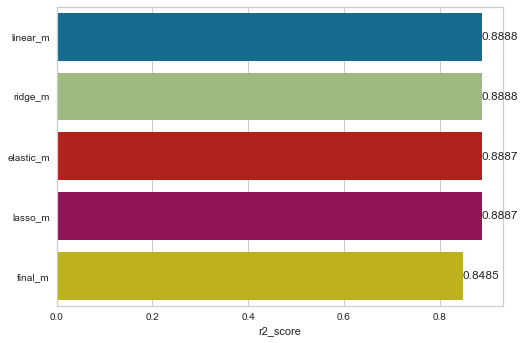

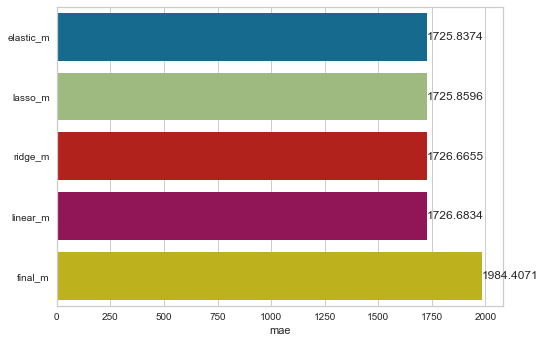

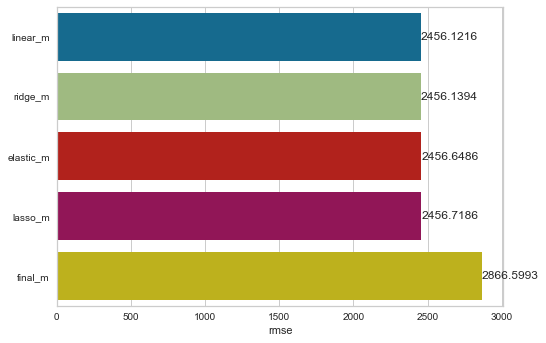

In [225]:
metrics = scores.columns
for i,j in enumerate(metrics):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

In [226]:
columns_name = X.columns

In [227]:
final_scaler = MinMaxScaler()

In [228]:
final_scaler.fit(X)

MinMaxScaler()

In [229]:
X = final_scaler.transform(X)

In [230]:
lasso_final_model = Lasso(alpha=0.01)

In [231]:
lasso_final_model.fit(X,y)

Lasso(alpha=0.01)

In [232]:
my_dict = {
    "hp_kW": 81,
    "age": 1,
    "km": 10000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [233]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,81,1,10000,Audi A3,Automatic


In [234]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,81,1,10000,1,1


In [235]:
my_dict = my_dict.reindex(columns=columns_name, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,81,10000,1,0,1,0,0,0,0,0,0,1,0,0


In [236]:
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,141.000,80000.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,85.000,83450.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,66.000,73000.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,66.000,16200.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0


In [237]:
my_dict = final_scaler.transform(my_dict)

In [238]:
my_dict

array([[0.148     , 0.03154574, 0.33333333, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [239]:
lasso_final_model.predict(my_dict)

array([22726.64387675])

# pickle

In [ ]:
file_name = "my_model_lasso"

In [ ]:
pickle.dump(lasso_final_model, open(file_name, "wb"))

pickle_file = open("auto_scout_pickle.pickle", "wb")
pickle.dump(df, pickle_file)

file_name = "auto_scout_pickle.pickle"

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___